In [1]:
import os

In [2]:
data_dir = 'C:\\Users\\Emirhan\\Downloads\\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2

In [5]:
test_path = data_dir + '\\test\\'
train_path = data_dir + '\\train\\'

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path + '\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [9]:
para_cell = train_path + '\\parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
para_img = imread(para_cell)

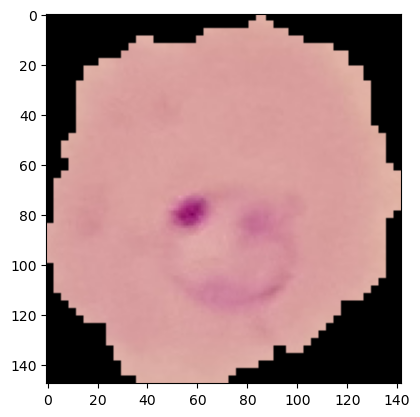

In [11]:
plt.imshow(para_img)

In [12]:
para_img.shape

(148, 142, 3)

In [13]:
os.listdir(train_path + '\\uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

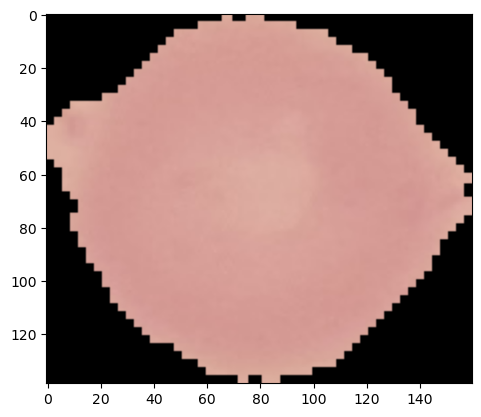

In [14]:
uninfected_cell = train_path + '\\uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'
uninfected_img = imread(uninfected_cell)
plt.imshow(uninfected_img)

In [15]:
len(os.listdir(train_path + 'parasitized'))

12480

In [16]:
len(os.listdir(train_path + 'uninfected'))

12480

In [17]:
len(os.listdir(test_path + 'parasitized'))

1300

In [18]:
len(os.listdir(test_path + 'uninfected'))

1300

In [19]:
para_img.shape

(148, 142, 3)

In [20]:
uninfected_img.shape

(139, 160, 3)

**Let's find out the average dimensions of these images.**

In [21]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + '\\uninfected'):

    img = imread(test_path + '\\uninfected\\' + image_filename )
    d1,d2,colors= img.shape
    dim1.append(d1)
    dim2.append(d2)

c:\Users\Emirhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


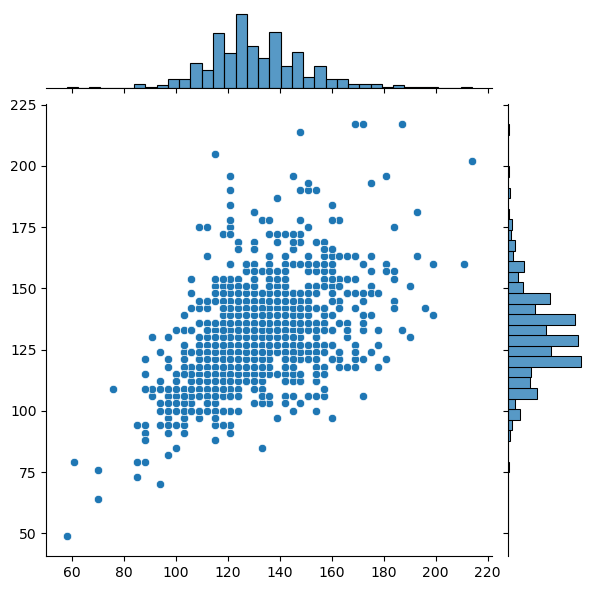

In [22]:
sns.jointplot(dim1,dim2)

In [23]:
np.mean(dim1)

130.92538461538462

In [24]:
np.mean(dim2)

130.75

In [25]:
image_shape = (130,130,3)

## Preparing the Data for the Model

### Image Manipulation

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
# help(ImageDataGenerator)

In [28]:
image_gen = ImageDataGenerator(rotation_range=20,  # rotate the image 20 degrees
                               width_shift_range=0.10,  # shift the pic width by a max of %5
                               height_shift_range=0.10,  # shift the pic height by a max of %5
                               rescale=1/255,  # rescale the image by normalizing it
                               shear_range=0.1,  # shear means cutting away part of the image
                               zoom_range=0.1,  # zoom in by 10% max
                               horizontal_flip=True,  # allo horizontal flipping
                               fill_mode='nearest'  # fill in missing pixels with the nearest filled value
                               )

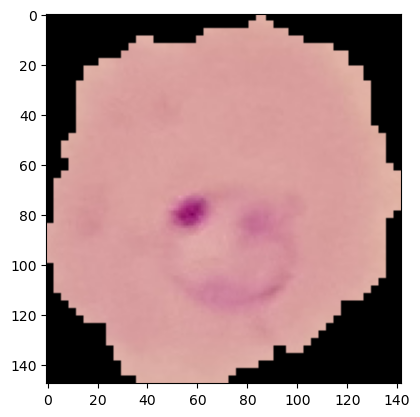

In [29]:
plt.imshow(para_img)

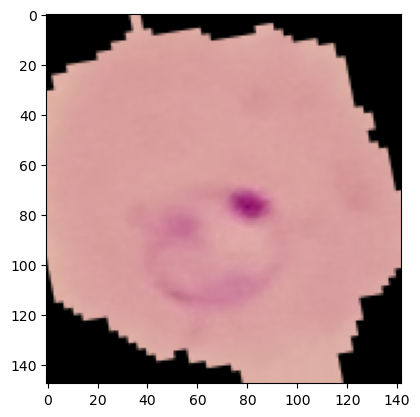

In [30]:
plt.imshow(image_gen.random_transform(para_img))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [31]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [32]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


## Creating the Model

In [33]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D

In [34]:
image_shape

(130, 130, 3)

In [35]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

## Early Stopping

In [37]:
from keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Traning the Model

In [39]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module keras.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest', keep_aspect_ratio=False) method of keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Args:
        directory: string, path to the target directory. It should contain
          one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images
          inside each of the subdirectories directory tree will be included
          in the generator. See [this script](
          https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
          for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
          256)`. The dimensions

In [45]:
batch_size = 16

In [50]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [51]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [52]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [53]:
#results = model.fit_generator(train_image_gen,
#                              epochs=20,
#                              validation_data=test_image_gen,
#                              callbacks=[early_stop])

C:\Users\Emirhan\AppData\Local\Temp\ipykernel_20628\2769811360.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,


Epoch 1/20
1315/1560 [========================>.....] - ETA: 53s - loss: 0.4991 - accuracy: 0.7447

KeyboardInterrupt: 

In [54]:
from keras.models import load_model

In [55]:
model = load_model('malaria_detector.h5')

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [58]:
model.evaluate_generator(test_image_gen)

C:\Users\Emirhan\AppData\Local\Temp\ipykernel_20628\4011314882.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[0.15029039978981018, 0.9492307901382446]

In [59]:
model.metrics_names

['loss', 'accuracy']

In [76]:
from keras.preprocessing import image

In [63]:
pred = model.predict_generator(test_image_gen)

C:\Users\Emirhan\AppData\Local\Temp\ipykernel_20628\2032896581.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_image_gen)


In [64]:
pred

array([[9.3544333e-04],
       [1.3121523e-04],
       [8.6721347e-04],
       ...,
       [9.7767764e-01],
       [9.8587132e-01],
       [9.7146386e-01]], dtype=float32)

In [68]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [69]:
predictions = pred > 0.5

In [70]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [73]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [74]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1220,   80],
       [  45, 1255]], dtype=int64)

## Predicting on an Image

In [75]:
para_cell

'C:\\Users\\Emirhan\\Downloads\\cell_images\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [82]:
my_image = image.image_utils.load_img(para_cell,target_size=image_shape)

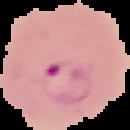

In [83]:
my_image

In [85]:
type(my_image)

PIL.Image.Image

In [86]:
my_image = image.image_utils.img_to_array(my_image)

In [87]:
type(my_image)

numpy.ndarray

In [88]:
my_image.shape

(130, 130, 3)

In [135]:
my_image = my_image.reshape(1,130,130,3)

In [136]:
my_image.shape

(1, 130, 130, 3)

In [137]:
model.predict(my_image)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

In [138]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [139]:
uninfected_cell

'C:\\Users\\Emirhan\\Downloads\\cell_images\\train\\\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [140]:
my_image2 = image.image_utils.load_img(uninfected_cell,target_size=image_shape)

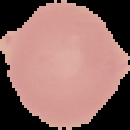

In [141]:
my_image2

In [142]:
my_image2 = image.image_utils.img_to_array(my_image2)

In [143]:
my_image2 = my_image.reshape(1,130,130,3)

In [144]:
my_image2.shape

(1, 130, 130, 3)

In [157]:
model.predict(my_image2)  # Hatalı

1/1 [==============================] - 0s 21ms/step


array([[0.]], dtype=float32)

In [158]:
os.listdir(train_path + '\\uninfected')[2]

'C100P61ThinF_IMG_20150918_144104_cell_144.png'

In [159]:
uninfected_cell2 = train_path + '\\uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_144.png'

In [160]:
uninfected_cell2

'C:\\Users\\Emirhan\\Downloads\\cell_images\\train\\\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_144.png'

In [161]:
my_image4 = image.image_utils.load_img(uninfected_cell2,target_size=image_shape)

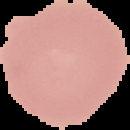

In [162]:
my_image4

In [163]:
my_image4 = image.image_utils.img_to_array(my_image4)

In [164]:
my_image4.shape

(130, 130, 3)

In [165]:
my_image4 = np.expand_dims(my_image4, axis=0)

In [166]:
my_image4.shape

(1, 130, 130, 3)

In [167]:
model.predict(my_image4)

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)

In [168]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}